代码4-3 关于电信公司客户流失的生存回归分析

In [3]:
import pandas as pd
inputfile='d:/survival data/customer.xlsx'#读取客户数据
data=pd.read_excel(inputfile)

In [4]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

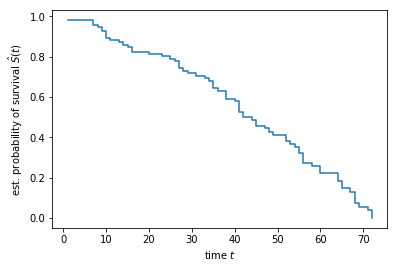

In [5]:
data['status']=data['churn']==0 #转换为boolean型
time, survival_prob = kaplan_meier_estimator(data['status'], data['tenure'])
plt.step(time, survival_prob, where="post")
plt.ylabel('est. probability of survival $\hat{S}(t)$')
plt.xlabel('time $t$')
plt.show()

In [6]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
import numpy as np

In [7]:
estimator = CoxPHSurvivalAnalysis()
data_x=data[['age','address','income','ed','employ','gender']]
data_ytp=np.dtype([('status','bool_'),('tenure','i4')])
data_yy=list(zip(data['status'],data['tenure']))
data_y=np.array(data_yy,dtype=data_ytp)

estimator.fit(data_x, data_y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [8]:
pd.Series(estimator.coef_, index=data_x.columns)

age       -0.014613
address   -0.029468
income    -0.000382
ed        -0.097120
employ    -0.051473
gender    -0.061506
dtype: float64

In [9]:
from sksurv.metrics import concordance_index_censored

In [10]:
prediction = estimator.predict(data_x)
result = concordance_index_censored(data_y["status"], data_y["tenure"], prediction)
result[0]

0.7567140600315956

In [11]:
estimator.score(data_x, data_y)

0.7567140600315956